# Robust regression

In [15]:
#Libraries
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
#Models
from sklearn.linear_model import(LinearRegression, Lasso, Ridge, ElasticNet, RANSACRegressor, HuberRegressor)
from sklearn.svm import SVR
#Tools 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import jaccard_score

In [2]:
#World Happiness Report
df=pd.read_csv('felicidad_corrupt.csv')

In [3]:
X=df[['gdp','family','lifexp','freedom','generosity','corruption','dystopia']]
y=df[['score']]

In [4]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)

In [5]:
estimators={
    'SVR':SVR(gamma='auto',C=1.0,epsilon=0.1),
    'RANSAC':RANSACRegressor(),
    'HUBER':HuberRegressor(epsilon=1.35)
}

In [14]:
for name, estimator in estimators.items():
    estimator.fit(X_train, np.array(y_train).ravel())
    predictions= estimator.predict(X_test)
    print('='*30)
    print(name)
    print("MSQ:","%.10f" % float(mean_squared_error(y_test,predictions)))
    print("Score", "%.8f" % float(estimator.score(X_test, y_test)))

SVR
MSQ: 0.0097323921
Score 0.99623828
RANSAC
MSQ: 0.0000000913
Score 0.99999996
HUBER
MSQ: 0.0000000985
Score 0.99999996


SVR


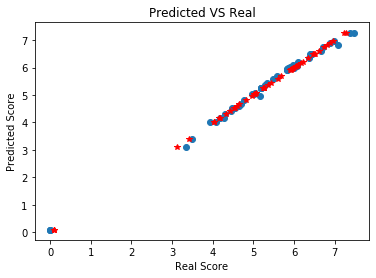

RANSAC


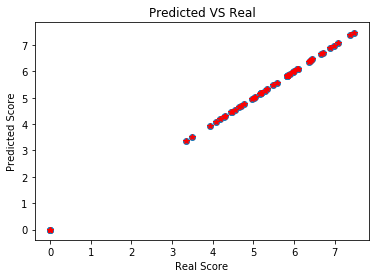

HUBER


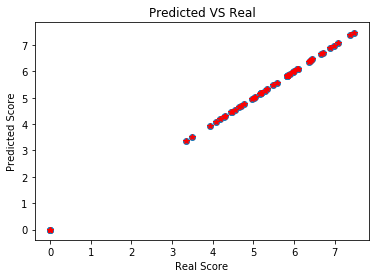

In [13]:
for name, estimator in estimators.items():
    estimator.fit(X_train, np.array(y_train).ravel())
    predictions = estimator.predict(X_test)
    print("=" * 32)
    print(name)
    plt.ylabel('Predicted Score')
    plt.xlabel('Real Score')
    plt.title('Predicted VS Real')
    plt.scatter(y_test, predictions)
    plt.plot(predictions, predictions,'r*')
    plt.show()